In [3]:
import numpy as np
from Contact_Map import *
from LegModel import *
import matplotlib.pyplot as plt

pi = np.pi
leg = Leg(0)

In [4]:
samples = 10000

theta_list = np.arange(17, 160, 1/samples) *pi/180
leg.calculate(theta_list, 0,0,0,0,0)
centerO1_r = abs(leg.linkleg.O1)
centerO2_r = abs(leg.linkleg.O2)

In [5]:
inv_upper_len_coef = [0.29658683, 30.60456432, -140.01537553, -3665.54320340, 101549.68264141, -1129787.34869127, 6230506.13958133, -13877346.85187231]
inv_lower_len_coef = [0.29705919, 10.63477927, -52.42231928, 575.17125579, -4066.33352307, 17938.62417078, -45442.98961624, 50592.10255294]
inv_upper_len_coef.reverse()
inv_lower_len_coef.reverse()

In [6]:
O1_r_coef = np.polyfit(theta_list, centerO1_r, 7)
O2_r_coef = np.polyfit(theta_list, centerO2_r, 7)
O1_r_coef_i = np.polyfit(centerO1_r, theta_list, 7)
O2_r_coef_i = np.polyfit(centerO2_r, theta_list, 7)
O1_x_coef = np.polyfit(theta_list, leg.linkleg.O1.real, 7)
O2_x_coef = np.polyfit(theta_list, leg.linkleg.O2.real, 7)
O1_y_coef = np.polyfit(theta_list, leg.linkleg.O1.imag, 7)
O2_y_coef = np.polyfit(theta_list, leg.linkleg.O2.imag, 7)

# print coefficient
print('O1 r coefficient:')
print(', '.join(map(str, O1_r_coef)))
print('O2 r coefficient:')
print(', '.join(map(str, O2_r_coef)))
print('O1 r inverse coefficient:')
print(', '.join(map(str, O1_r_coef_i)))
print('O2 r inverse coefficient:')
print(', '.join(map(str, O2_r_coef_i)))
print('O1 x coefficient:')
print(', '.join(map(str, O1_x_coef)))
print('O2 x coefficient:')
print(', '.join(map(str, O2_x_coef)))
print('O1 y coefficient:')
print(', '.join(map(str, O1_y_coef)))
print('O2 y coefficient:')
print(', '.join(map(str, O2_y_coef)))

O1 r coefficient:
0.00016809850335767834, -0.0004958410663622997, -0.004380289892083603, 0.02139559477415245, -0.02869980633075125, 0.025575949143815602, 0.022188135948843217, -0.008206092431648325
O2 r coefficient:
0.00034800160100402196, -0.003538548719503779, 0.010129398595414757, -0.0006476210475824077, -0.04729189587067348, 0.09662506718154432, 0.04712048432528614, -0.021243498932086605
O1 r inverse coefficient:
-1657663.9817529884, 1067959.7623548117, -261547.09889717825, 27998.38121538315, -399.43288898918945, -211.5277249909067, 31.24201686735481, 0.29524047709408896
O2 r inverse coefficient:
101568.42569608112, -98163.0166300306, 38941.64890431835, -8170.916114573577, 986.697371515414, -72.41431581255284, 11.024114262221278, 0.2953055049340184
O1 x coefficient:
2.5058158166923904e-05, -0.0003701404834707107, 0.0007517754934475016, 0.0008699189607939045, 0.00296346313807433, 0.0014182586352956188, -0.03326878815458749, 0.009669521453029467
O2 x coefficient:
0.000159894647545317

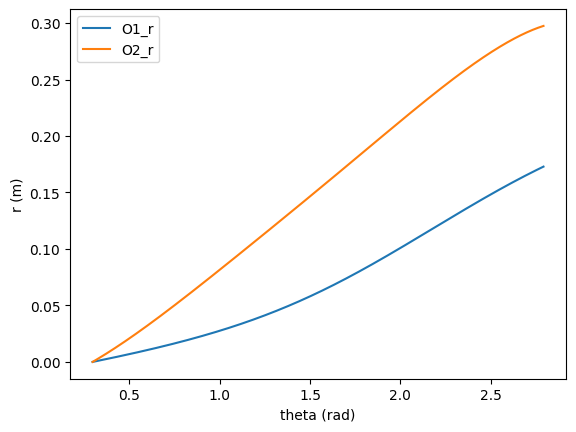

In [7]:
plt.plot(theta_list, centerO1_r, label='O1_r')
plt.plot(theta_list, centerO2_r, label='O2_r')
plt.legend()
plt.xlabel('theta (rad)')
plt.ylabel('r (m)')
plt.show()

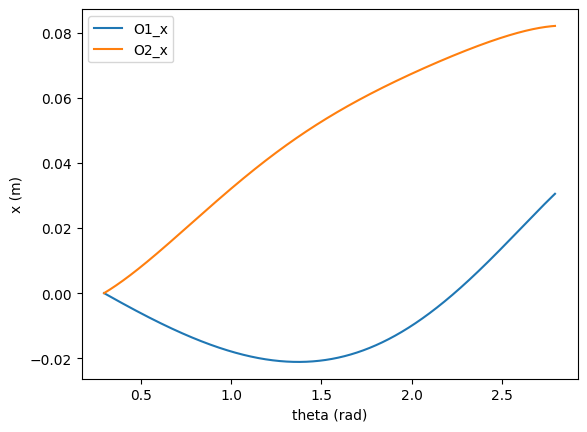

In [8]:
plt.plot(theta_list, leg.linkleg.O1.real, label='O1_x')
plt.plot(theta_list, leg.linkleg.O2.real, label='O2_x')
plt.legend()
plt.xlabel('theta (rad)')
plt.ylabel('x (m)')
plt.show()

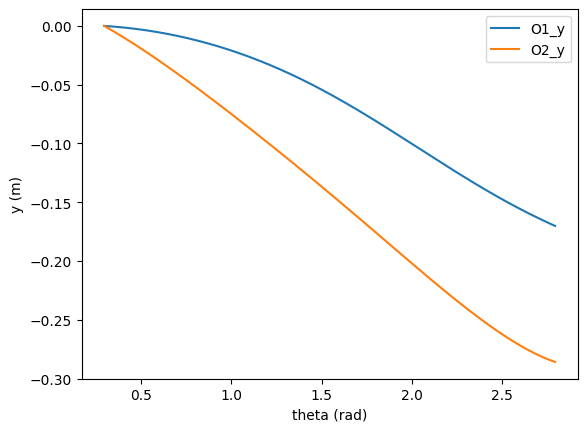

In [9]:
plt.plot(theta_list, leg.linkleg.O1.imag, label='O1_y')
plt.plot(theta_list, leg.linkleg.O2.imag, label='O2_y')
plt.legend()
plt.xlabel('theta (rad)')
plt.ylabel('y (m)')
plt.show()

In [10]:
G_r = abs(leg.linkleg.G.imag)
G_coef = np.polyfit(theta_list, G_r, 7)
G_coef_i = np.polyfit(G_r, theta_list, 7)

print('G coefficient:')
print(', '.join(map(str, G_coef)))
print('G inverse coefficient:')
print(', '.join(map(str, G_coef_i)))

G coefficient:
0.00046520348966402143, -0.0030345971149593753, 0.001110652230185948, 0.031030482728180937, -0.08885407977475525, 0.10580850805809096, 0.0430110986126656, 0.08004470660350788
G inverse coefficient:
342037.77993523853, -511744.2542588946, 325133.4897017205, -113384.68778230867, 23374.361772185646, -2844.179442876283, 198.86115886297483, -5.959001360949428


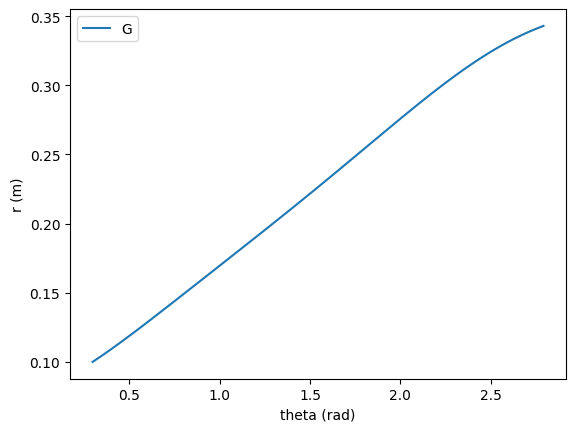

In [11]:
plt.plot(theta_list, np.polyval(G_coef, theta_list), label='G')
plt.legend()
plt.xlabel('theta (rad)')
plt.ylabel('r (m)')
plt.show()

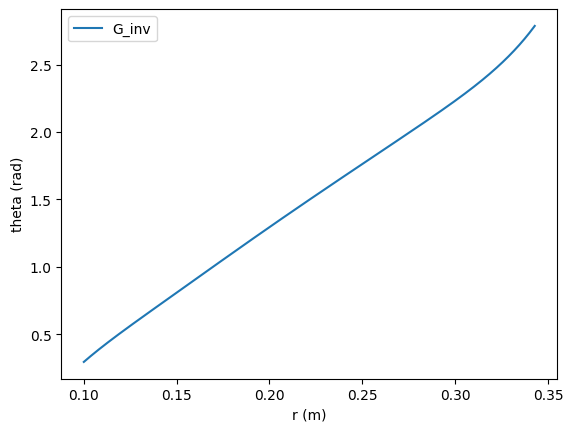

In [13]:
plt.plot(G_r, np.polyval(G_coef_i, G_r), label='G_inv')
plt.legend()
plt.xlabel('r (m)')
plt.ylabel('theta (rad)')
plt.show()

samples=10000

O1 r coefficient:
0.00016809850335767834, -0.0004958410663622997, -0.004380289892083603, 0.02139559477415245, -0.02869980633075125, 0.025575949143815602, 0.022188135948843217, -0.008206092431648325
O2 r coefficient:
0.00034800160100402196, -0.003538548719503779, 0.010129398595414757, -0.0006476210475824077, -0.04729189587067348, 0.09662506718154432, 0.04712048432528614, -0.021243498932086605
O1 r inverse coefficient:
-1657663.9817529884, 1067959.7623548117, -261547.09889717825, 27998.38121538315, -399.43288898918945, -211.5277249909067, 31.24201686735481, 0.29524047709408896
O2 r inverse coefficient:
101568.42569608112, -98163.0166300306, 38941.64890431835, -8170.916114573577, 986.697371515414, -72.41431581255284, 11.024114262221278, 0.2953055049340184
O1 x coefficient:
2.5058158166923904e-05, -0.0003701404834707107, 0.0007517754934475016, 0.0008699189607939045, 0.00296346313807433, 0.0014182586352956188, -0.03326878815458749, 0.009669521453029467
O2 x coefficient:
0.00015989464754531736, -0.00213482348717699, 0.008709582727395342, -0.008554823790656228, -0.02548078653005314, 0.06028321316858436, 0.005373716025484302, -0.006205714332002254
O1 y coefficient:
-0.00016159611154839456, 0.0003729835317797429, 0.004526607039246024, -0.01978452627876553, 0.029791761884840645, -0.04975540648449578, 0.0147729455904317, -0.0006689908386119535
O2 y coefficient:
-0.00021893913967205262, 0.002077109954336962, -0.0042957908070916356, -0.007719270559319062, 0.0441501647359269, -0.08046576990681018, -0.04889899761141475, 0.020478468537186892

G coefficient:
0.00046520348966402143, -0.0030345971149593753, 0.001110652230185948, 0.031030482728180937, -0.08885407977475525, 0.10580850805809096, 0.0430110986126656, 0.08004470660350788
G inverse coefficient:
342037.77993523853, -511744.2542588946, 325133.4897017205, -113384.68778230867, 23374.361772185646, -2844.179442876283, 198.86115886297483, -5.959001360949428
